In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fixed_csv_file_1 = './results/FIXED_RA_DEC_RADIUS/ra_220_dec_36_radius_16/ra_220_dec_36_radius_16.csv'
fixed_csv_file_2 = './results/FIXED_RA_DEC_RADIUS/ra_220_dec_36_radius_16_cpix/ra_220_dec_36_radius_16_cpix.csv'
fixed_csv_file_3 = './results/FIXED_RA_DEC_RADIUS/ra_220_dec_36_radius_16_tilt/ra_220_dec_36_radius_16_tilt.csv'
fixed_csv_file_4 = './results/FIXED_RA_DEC_RADIUS/ra_220_dec_36_radius_16_cpix_tilt/ra_220_dec_36_radius_16_cpix_tilt.csv'

In [2]:
# READ THE CSV FILE
#fixed_1 = pd.read_csv(fixed_csv_file_1)
#fixed_1 = pd.read_csv(fixed_csv_file_2)
#fixed_1 = pd.read_csv(fixed_csv_file_3)
fixed_1 = pd.read_csv(fixed_csv_file_4)

## include only 'calc_succeeded'=True rows
#fixed_1 = fixed_1[ (fixed_1['calc_succeeded']==True) ]

## Extract columns of interest ...

In [3]:
calc_succeeded = []
heading = []
lat = []
lon = []
pitch = []
roll = []
nb_bright_stars = []
true_rotation = []
true_lat = []
true_lon = []
solve_time = []
nb_entries = fixed_1['pitch'].size
for ii in range(nb_entries):
    
    calc_succeeded.append(fixed_1['calc_succeeded'][ii])
    
    val = np.round(fixed_1['heading'][ii],3)
    headingStr = f'{val:.3f}'
    heading.append( np.array([float(headingStr)])[0] if calc_succeeded else np.nan )
    
    val = np.round(fixed_1['lat'][ii],3)
    latStr = f'{val:.3f}'
    lat.append(np.array([float(latStr)])[0] if calc_succeeded else np.nan)
    
    val = np.round(fixed_1['lon'][ii],3)
    lonStr = f'{val:.3f}'
    lon.append(np.array([float(lonStr)])[0] if calc_succeeded else np.nan)
    
    val = np.round(fixed_1['pitch'][ii],3)
    pitchStr = f'{val:.3f}'
    pitch.append(float(pitchStr))
    
    val = np.round(fixed_1['roll'][ii],3)
    rollStr = f'{val:.3f}'
    roll.append(float(rollStr))
    
    nb_bright_stars.append(fixed_1['number_bright_stars'][ii])
    
    true_rotation.append( fixed_1['true rotation'][ii] )
    
    val = np.round(fixed_1['true latitude'][ii],3)
    tlatStr = f'{val:.3f}'
    true_lat.append(float(tlatStr))
    
    val = np.round(fixed_1['true longitude'][ii],3)
    tlonStr = f'{val:.3f}'
    true_lon.append(float(tlonStr))
    
    solve_time.append(fixed_1['solve_time'][ii])
    
    to_print = [heading, lat, lon, pitch, roll, nb_bright_stars, true_rotation, true_lat, true_lon, solve_time]
    #print( " ".join([str(x) for x in to_print]) )


In [4]:
heading_360 = [(x+360)%360 for x in heading]
err_heading = []
for ii in range(nb_entries):
    y_e1 = abs(heading_360[ii] - true_rotation[ii])
    y_e2 = abs(heading_360[ii] - true_rotation[ii]-360)
    err_heading.append( min(y_e1, y_e2) )
err_heading = [ err_heading[ii] if calc_succeeded[ii]==True else np.nan for ii in range(len(heading)) ]
#print(err_heading)

err_latitude = []
for ii in range(nb_entries):
    err_latitude.append(abs(true_lat[ii] - lat[ii]))
err_latitude = [ err_latitude[ii] if calc_succeeded[ii]==True else np.nan for ii in range(len(lat)) ]
#print(err_latitude)

err_longitude = []
for ii in range(nb_entries):
    err_longitude.append(abs(true_lon[ii] - lon[ii]))
err_longitude = [ err_longitude[ii] if calc_succeeded[ii]==True else np.nan for ii in range(len(lat)) ]
print(err_longitude)

[6.131, 5.917999999999992, 5.771000000000001, 6.713999999999999, 0.49099999999999966, 0.12999999999999545, 4.516999999999996, 6.9069999999999965, 0.6389999999999958, 6.9809999999999945, 2.6640000000000015, 3.6670000000000016, 1.5319999999999965, 1.2210000000000036, 3.766999999999996, 4.650999999999996, 3.284000000000006, 0.9540000000000077, 2.0720000000000027, 5.192999999999998, 2.585000000000008, 6.653999999999996, 0.394999999999996, 6.075000000000003, 3.796999999999997, 6.962000000000003, 0.9119999999999919, 3.462999999999994, 5.138999999999996, 2.272999999999996, 5.804999999999993, 5.984999999999999, 0.2879999999999967, 5.527000000000001, 0.37000000000000455, 0.022999999999996135, 0.5370000000000061, 3.8880000000000052, 0.8900000000000006, 0.8509999999999991, 4.909999999999997, 0.9699999999999989, 0.2079999999999984, 6.116, 1.2079999999999984, 5.2309999999999945, 0.5600000000000023, 2.188999999999993, 4.200999999999993, 4.179000000000002, 5.320999999999998, 0.06799999999999784, 5.71

## Plot the heading results

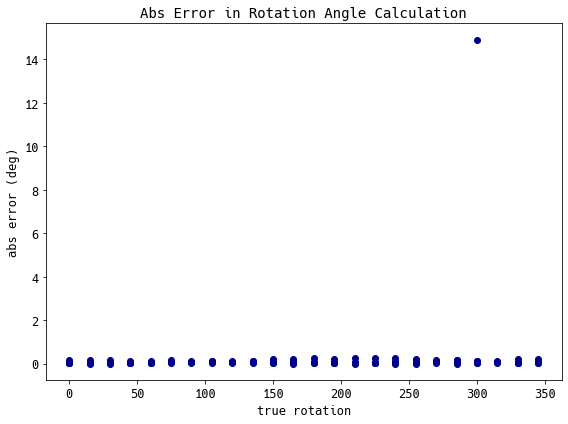

In [5]:
# PLOT CALCULATION ERROR
cf = 'darkblue'
fig=plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax=fig.add_subplot(111)

ax.plot(true_rotation, err_heading, 'o', color=cf)

ax.set_xlabel('true rotation', fontsize=12, fontname='hack')
#ax.set_xlim([0,8])
ax.set_ylabel('abs error (deg)', fontsize=12, fontname='hack')
#ax.set_ylim([0,6])
#plt.legend(loc='upper center')
#plt.show()
plt.xticks(fontsize=12, fontname='hack', rotation=0)
plt.yticks(fontsize=12, fontname='hack', rotation=0)
plt.title('Abs Error in Rotation Angle Calculation', fontsize=14, fontname='hack')
plt.tight_layout()
plt.savefig('./heading_errors.png', bbox_inches='tight', pad_inches=0.1)


## Plot the latitude results

In [6]:
# PLOT CALCULATION ERROR
cf = 'darkorange'
fig=plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax=fig.add_subplot(111)

ax.plot(true_rotation, err_latitude, 'o', color=cf)

ax.set_xlabel('true rotation', fontsize=12, fontname='hack')
#ax.set_xlim([0,8])
ax.set_ylabel('abs error (deg)', fontsize=12, fontname='hack')
#ax.set_ylim([0,6])
#plt.legend(loc='upper center')
#plt.show()
plt.xticks(fontsize=12, fontname='hack', rotation=0)
plt.yticks(fontsize=12, fontname='hack', rotation=0)
plt.title('Abs Error in Latitude Calculation', fontsize=14, fontname='hack')
plt.tight_layout()
plt.savefig('./latitude_errors.png', bbox_inches='tight', pad_inches=0.1)

## Plot Longitude results

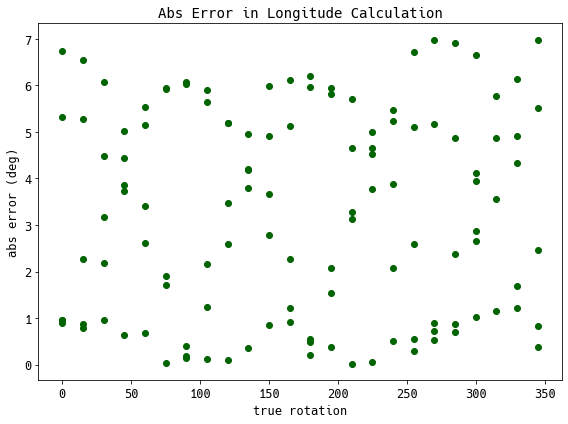

In [7]:
# PLOT CALCULATION ERROR
cf = 'darkgreen'
fig=plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax=fig.add_subplot(111)

ax.plot(true_rotation, err_longitude, 'o', color=cf)

ax.set_xlabel('true rotation', fontsize=12, fontname='hack')
#ax.set_xlim([0,8])
ax.set_ylabel('abs error (deg)', fontsize=12, fontname='hack')
#ax.set_ylim([0,6])
#plt.legend(loc='upper center')
#plt.show()
plt.xticks(fontsize=12, fontname='hack', rotation=0)
plt.yticks(fontsize=12, fontname='hack', rotation=0)
plt.title('Abs Error in Longitude Calculation', fontsize=14, fontname='hack')
plt.tight_layout()
plt.savefig('./longitude_errors.png', bbox_inches='tight', pad_inches=0.1)

## Plot the timing results

In [8]:
cf = 'darkred'
fig=plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax=fig.add_subplot(111)

ax.plot(true_rotation, solve_time, 'o', color=cf)

ax.set_xlabel('true rotation', fontsize=12, fontname='hack')
#ax.set_xlim([0,8])
ax.set_ylabel('abs error (deg)', fontsize=12, fontname='hack')
#ax.set_ylim([0,6])
#plt.legend(loc='upper center')
#plt.show()
plt.xticks(fontsize=12, fontname='hack', rotation=0)
plt.yticks(fontsize=12, fontname='hack', rotation=0)
plt.title('Solve Time (milliseconds)', fontsize=14, fontname='hack')
plt.tight_layout()
plt.savefig('./solve_time.png', bbox_inches='tight', pad_inches=0.1)